In [2]:
library(data.table)
library(ggplot2)
library(heatmaply)
library(ggpubr)
library(grid)
library(gridExtra)
library(ape)
library(dplyr)
library(propr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: plotly

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout

Loading required package: viridis
Loading required package: viridisLite

Welcome to heatmaply version 1.1.1

Type citation('heatmaply') for how to cite the package.
Type ?heatmaply for the main documentation.

The github page is: https://github.com/talgalili/heatmaply/
Please submit your suggestions and bug-reports at: https://github.com/talgalili/heatmaply/issues
Or contact: <tal.galili@gmail.com>


Attaching package: ‘ape’

The following object is masked from ‘package:ggpubr’:

    rotate


Attaching package: ‘dplyr’

The following object is masked from ‘package:gridExtra’:

    com

In [148]:
library(devtools)
install_github("vqv/ggbiplot")

Warning message in get0(oNam, envir = ns):
“restarting interrupted promise evaluation”
Warning message in get0(oNam, envir = ns):
“internal error -3 in R_decompress1”


ERROR: Error: Failed to install 'ggbiplot' from GitHub:
  lazy-load database '/srv/home/s4331221/.conda/envs/jupyter/lib/R/library/pkgbuild/R/pkgbuild.rdb' is corrupt


In [3]:
abundances <- fread("/work/microbiome/abisko/rhys/01-projects/08-coevolution/00-abisko_coev/647_coverages_and_abundances.tsv")

In [4]:
abundances

Genome,20100900_E1D.1.trim100.fa.gz Mean,20100900_E1D.1.trim100.fa.gz Trimmed Mean,20100900_E1D.1.trim100.fa.gz Relative Abundance (%),20100900_E1D.1.trim100.fa.gz Variance,20100900_E1S.1.trim100.fa.gz Mean,20100900_E1S.1.trim100.fa.gz Trimmed Mean,20100900_E1S.1.trim100.fa.gz Relative Abundance (%),20100900_E1S.1.trim100.fa.gz Variance,20100900_E2D.1.trim100.fa.gz Mean,...,SHRC2_12.R1.fq.gz Relative Abundance (%),SHRC2_12.R1.fq.gz Variance,SHRC2_13.R1.fq.gz Mean,SHRC2_13.R1.fq.gz Trimmed Mean,SHRC2_13.R1.fq.gz Relative Abundance (%),SHRC2_13.R1.fq.gz Variance,SHRC2_14.R1.fq.gz Mean,SHRC2_14.R1.fq.gz Trimmed Mean,SHRC2_14.R1.fq.gz Relative Abundance (%),SHRC2_14.R1.fq.gz Variance
unmapped,NA,NA,72.92677000,NA,NA,NA,89.043360000,NA,NA,...,54.51734000,NA,NA,NA,52.0047100,NA,NA,NA,55.68653500,NA
73.20111000_P3M.106.renamed_contigs,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0.00000000,0.000000000,0.0000000,0.0000000,...,0.00000000,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,0.000000,0.0000000,0.00000000,0.0000000
73.20110800_E3D.67.renamed_contigs,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0.00000000,0.000000000,0.0000000,0.0000000,...,0.00000000,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,0.000000,0.0000000,0.00000000,0.0000000
73.20120700_S1D.328.renamed_contigs,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0.00000000,0.000000000,0.0000000,0.0000000,...,0.00000000,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,0.000000,0.0000000,0.00000000,0.0000000
73.20120700_P3D.271.renamed_contigs,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0.00000000,0.000000000,0.0000000,0.0000000,...,0.00000000,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,0.000000,0.0000000,0.00000000,0.0000000
73.20120700_P3D.324.renamed_contigs,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0.00000000,0.000000000,0.0000000,0.0000000,...,0.00000000,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,0.000000,0.0000000,0.00000000,0.0000000
73.20120500_P16.21.renamed_contigs,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0.00000000,0.000000000,0.0000000,0.0000000,...,0.00000000,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,0.000000,0.0000000,0.00000000,0.0000000
a86_untrimmed.bin226.renamed_contigs,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0.00000000,0.000000000,0.0000000,0.0000000,...,0.00000000,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,0.000000,0.0000000,0.00000000,0.0000000
a86_untrimmed.bin106.renamed_contigs,0.7780073,0.5994317,0.02276074,2.5102203,0.2169314,0.11507521,0.006346724,1.6138053,0.2007704,...,0.00000000,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,0.000000,0.0000000,0.00000000,0.0000000
73.20120700_S1D.351.renamed_contigs,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0.00000000,0.000000000,0.0000000,0.0000000,...,0.00000000,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,0.000000,0.0000000,0.00000000,0.0000000


In [1]:
library(data.table)
library(ggplot2)
library(heatmaply)
library(propr)

# Read in coverm results
abundances <- fread("/work/microbiome/abisko/rhys/01-projects/08-coevolution/00-abisko_coev/647_coverages_and_abundances.tsv")

# Split up coverm table
relative_cols <- c("Genome", colnames(abundances)[grepl("Relative", colnames(abundances))])
variance_cols <- c("Genome", colnames(abundances)[grepl("Variance", colnames(abundances))])
trimmed_cols <- c("Genome", colnames(abundances)[grepl("Trimmed", colnames(abundances))])
mean_cols <- c("Genome", colnames(abundances)[grepl("z Mean", colnames(abundances))])

relative_abundances <- abundances[, ..relative_cols]
variance_abundances <- abundances[, ..variance_cols]
trimmed_abundances <- abundances[, ..trimmed_cols]
mean_abundances <- abundances[, ..mean_cols]

relative_abundances_t <- as.data.frame(t(relative_abundances[, !"Genome"]))
colnames(relative_abundances_t) <- relative_abundances$Genome
relative_cor <- as.data.frame(cor(scale(relative_abundances_t[-1])))
rownames(relative_cor) <- colnames(relative_cor)
relative_cor <- mutate_all(relative_cor , ~replace(., is.na(.), 0))
# relative_abundances[Genome!="unmapped"]

trimmed_abundances_t <- as.data.frame(t(trimmed_abundances[, !"Genome"]))
colnames(trimmed_abundances_t) <- trimmed_abundances$Genome
trimmed_cor <- as.data.frame(cor(scale(trimmed_abundances_t[-1])))
trimmed_cor <- mutate_all(trimmed_cor , ~replace(., is.na(.), 0))

### Propr on all
trimmed_abundances_melt <- as.data.table(melt(trimmed_abundances, id.vars=c("Genome")))[value>=5, ]
trimmed_abundances_melt %>% 
    filter(Genome %in% trimmed_abundances_melt[, .N>5, by=Genome][V1==TRUE, ]$Genome) -> trimmed_abundances_ten
trimmed_abundances_ten_table <- trimmed_abundances[Genome %in% trimmed_abundances_ten$Genome, ]

trimmed_abundances_ten <- as.data.frame(t(trimmed_abundances_ten_table[, !"Genome"]))
colnames(trimmed_abundances_ten) <- trimmed_abundances_ten_table$Genome
trimmed_cor_ten <- as.data.frame(cor(scale(trimmed_abundances_ten[-1])))
trimmed_cor_ten <- mutate_all(trimmed_cor_ten , ~replace(., is.na(.), 0))
rownames(trimmed_cor_ten) <- colnames(trimmed_cor_ten)

trimmed_propr_high <- propr(trimmed_abundances_ten, 
                            metric="rho", 
                            ivar="clr",
                            alpha=NA,
                            p=500,
                            )

# ~~~~~~~~~requires limma which is not available for R 4.0.1~~~~~~~~~~~~~~
# trimmed_propr_high <- propd(trimmed_abundances_p_ten, 
#                             rownames(trimmed_abundances_p_ten), 
#                             alpha=NA, 
#                             weighted=TRUE,
#                             p=100)

updateCutoffs(trimmed_propr_high,
              cutoff = seq(0, 0.01, .001), # cutoffs at which to estimate FDR
              ncores = 20) # parallelize here
best <- trimmed_propr_high[">", .999]

tmp <- heatmaply_cor(trimmed_propr_high@matrix,
          xlab = "MAGs",
          ylab = "MAGs",
          file = "/srv/projects/abisko/rhys/01-projects/08-coevolution/00-abisko_coev/high_coverage_all_mag_proportionality_heatmap.html",
          k_row = 2, k_col = 2, plot_method="ggplot")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: plotly

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout

Loading required package: viridis
Loading required package: viridisLite

Welcome to heatmaply version 1.1.1

Type citation('heatmaply') for how to cite the package.
Type ?heatmaply for the main documentation.

The github page is: https://github.com/talgalili/heatmaply/
Please submit your suggestions and bug-reports at: https://github.com/talgalili/heatmaply/issues
Or contact: <tal.galili@gmail.com>



ERROR: Error in mutate_all(relative_cor, ~replace(., is.na(.), 0)): could not find function "mutate_all"


In [4]:
trimmed_abundances_ten

,73.20120600_E3D.84.renamed_contigs,73.20110800_E1M.18.renamed_contigs,73.20120700_S3D.51.renamed_contigs,73.20100900_E1D.45.renamed_contigs,73.20120800_E2D.34.renamed_contigs,73.20110800_E3D.64.renamed_contigs,73.20110800_E2M.39.renamed_contigs,73.20120800_E3D.23.renamed_contigs,73.20120800_E1D.52.renamed_contigs,73.20110700_S3M.57.renamed_contigs,⋯,73.20110600_S1D.6.renamed_contigs,73.20110800_E2D.14.renamed_contigs,73.20111000_P2D.26.renamed_contigs,73.20100900_E1D.1.renamed_contigs,73.20110600_S2D.10.renamed_contigs,73.20120800_E2X.42.renamed_contigs,73.20100900_E3D.38.renamed_contigs,73.20100900_E1D.29.renamed_contigs,73.20120600_E2D.49.renamed_contigs,73.20100900_E3D.21.renamed_contigs
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20100900_E1D.1.trim100.fa.gz Trimmed Mean,2.3895974,4.20987400,0.0000000,15.7821490,1.24161500,1.89964130,2.98120670,0.23499740,0.00000000,0.0000000,⋯,1.3903656,0,0.00000000,27.92363000,11.13005600,0.00000000,6.6258736,33.722800,10.2179250,7.94890500
20100900_E1S.1.trim100.fa.gz Trimmed Mean,1.0754311,0.31712827,0.0000000,0.9525760,0.21014328,0.36696830,0.78078663,0.43984430,0.00000000,0.0000000,⋯,0.2227778,0,0.00000000,16.19842300,5.94767570,0.00000000,2.7503564,5.759770,2.5263395,3.45557050
20100900_E2D.1.trim100.fa.gz Trimmed Mean,5.6606770,3.53399440,0.0000000,8.0590520,2.18598530,1.37581130,3.07097390,0.66630670,0.00000000,0.0000000,⋯,2.5490334,0,0.00000000,60.10164300,6.67457440,0.36522666,6.3448470,7.561735,2.9159205,4.23734760
20100900_E2S.1.trim100.fa.gz Trimmed Mean,0.2787778,2.43408400,0.0000000,0.0000000,1.51090680,0.43840950,3.11299200,0.38151217,0.00000000,0.0000000,⋯,0.0000000,0,0.00000000,3.15252730,0.26382232,0.57590520,2.2815926,0.000000,0.1612196,1.79590730
20100900_E3D.1.trim100.fa.gz Trimmed Mean,0.5990025,7.78684200,0.0000000,14.7193720,1.80372150,0.91734950,1.08975550,0.43987265,0.00000000,0.0000000,⋯,1.4855008,0,0.00000000,64.47822600,6.98062660,0.09450813,15.9973260,27.732447,4.3227096,28.93537100
20100900_E3S.1.trim100.fa.gz Trimmed Mean,0.0000000,1.04468550,0.0000000,0.3919646,0.21155685,0.29839170,0.31182182,0.12277824,0.00000000,0.0000000,⋯,0.0000000,0,0.00000000,1.09079280,0.08756591,0.00000000,0.2393832,0.527234,0.1531773,4.64462000
20110600_E1D.1.trim100.fa.gz Trimmed Mean,1.2185717,0.43584925,0.0000000,2.0058885,0.07007752,0.05692204,0.13150252,0.00000000,0.00000000,0.0000000,⋯,0.1764566,0,0.00000000,4.93897000,1.50539620,0.00000000,0.4878104,2.760294,0.9897646,0.84199590
20110600_E1M.1.trim100.fa.gz Trimmed Mean,0.5906672,0.41310465,0.0000000,0.2049426,0.09284449,0.14691582,0.46547303,0.20149261,0.00000000,0.0000000,⋯,0.0000000,0,0.00000000,4.67262600,2.47656130,0.00000000,1.5026230,1.970277,0.7627419,0.95303460
20110600_E1S.1.trim100.fa.gz Trimmed Mean,0.0000000,0.00000000,0.0000000,0.0000000,0.00000000,0.00000000,0.08295418,0.00000000,0.00000000,0.0000000,⋯,0.0000000,0,0.00000000,0.10522830,0.00000000,0.00000000,0.0000000,0.000000,0.0000000,0.08457182


In [52]:
p_sum <- abundances[Genome %like% "_P28",]
p_sum[, `:=`(SUM = rowSums(.SD, na.rm=T)), .SDcols=!c("Genome")]
p_sum

Genome,20100900_E1D.1.trim100.fa.gz Mean,20100900_E1D.1.trim100.fa.gz Trimmed Mean,20100900_E1D.1.trim100.fa.gz Relative Abundance (%),20100900_E1D.1.trim100.fa.gz Variance,20100900_E1S.1.trim100.fa.gz Mean,20100900_E1S.1.trim100.fa.gz Trimmed Mean,20100900_E1S.1.trim100.fa.gz Relative Abundance (%),20100900_E1S.1.trim100.fa.gz Variance,20100900_E2D.1.trim100.fa.gz Mean,⋯,SHRC2_12.R1.fq.gz Variance,SHRC2_13.R1.fq.gz Mean,SHRC2_13.R1.fq.gz Trimmed Mean,SHRC2_13.R1.fq.gz Relative Abundance (%),SHRC2_13.R1.fq.gz Variance,SHRC2_14.R1.fq.gz Mean,SHRC2_14.R1.fq.gz Trimmed Mean,SHRC2_14.R1.fq.gz Relative Abundance (%),SHRC2_14.R1.fq.gz Variance,SUM
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
73.20120500_P28.28.renamed_contigs,0.0000000,0.00000000,0.000000000,0.000000,0.0000000,0.00000000,0.000000000,0.000000,0.0000000,⋯,0.00000,0.0000000,0.0000000,0.00000000,0.0000,0.0000000,0.0000000,0.000000,0.00000,182.85041
73.20120500_P28.9.renamed_contigs,0.0000000,0.00000000,0.000000000,0.000000,0.0000000,0.00000000,0.000000000,0.000000,0.0000000,⋯,10.43809,0.8696755,0.3625861,0.08817758,16.4258,0.6757869,0.2508002,0.073419,10.88282,17225.04225
73.20120500_P28.34.renamed_contigs,0.0000000,0.00000000,0.000000000,0.000000,0.0000000,0.00000000,0.000000000,0.000000,0.0000000,⋯,0.00000,0.0000000,0.0000000,0.00000000,0.0000,0.0000000,0.0000000,0.000000,0.00000,667.44307
73.20120500_P28.8.renamed_contigs,0.0000000,0.00000000,0.000000000,0.000000,0.0000000,0.00000000,0.000000000,0.000000,0.0000000,⋯,0.00000,0.0000000,0.0000000,0.00000000,0.0000,0.0000000,0.0000000,0.000000,0.00000,707.46705
73.20120500_P28.26.renamed_contigs,0.2807131,0.09214432,0.008212308,2.929431,1.0529971,0.52952033,0.030807348,8.771678,0.5312173,⋯,0.00000,0.0000000,0.0000000,0.00000000,0.0000,0.0000000,0.0000000,0.000000,0.00000,605.79285
73.20120500_P28.7.renamed_contigs,0.0000000,0.00000000,0.000000000,0.000000,0.0000000,0.00000000,0.000000000,0.000000,0.0000000,⋯,0.00000,0.0000000,0.0000000,0.00000000,0.0000,0.0000000,0.0000000,0.000000,0.00000,821.06965
73.20120500_P28.39.renamed_contigs,0.8235210,0.24356130,0.024092248,12.258184,0.4567063,0.17895855,0.013361776,2.893515,0.5792503,⋯,0.00000,0.0000000,0.0000000,0.00000000,0.0000,0.0000000,0.0000000,0.000000,0.00000,1480.66979
73.20120500_P28.43.renamed_contigs,0.0000000,0.00000000,0.000000000,0.000000,0.0000000,0.00000000,0.000000000,0.000000,0.0000000,⋯,0.00000,0.0000000,0.0000000,0.00000000,0.0000,0.0000000,0.0000000,0.000000,0.00000,54.10639
73.20120500_P28.32.renamed_contigs,0.0000000,0.00000000,0.000000000,0.000000,0.2761296,0.05790408,0.008078675,1.817894,0.0000000,⋯,0.00000,0.0000000,0.0000000,0.00000000,0.0000,0.0000000,0.0000000,0.000000,0.00000,425.25347


In [3]:
relative_cols <- c("Genome", colnames(abundances)[grepl("Relative", colnames(abundances))])
variance_cols <- c("Genome", colnames(abundances)[grepl("Variance", colnames(abundances))])
trimmed_cols <- c("Genome", colnames(abundances)[grepl("Trimmed", colnames(abundances))])
mean_cols <- c("Genome", colnames(abundances)[grepl("z Mean", colnames(abundances))])

relative_abundances <- abundances[, ..relative_cols]
variance_abundances <- abundances[, ..variance_cols]
trimmed_abundances <- abundances[, ..trimmed_cols]
mean_abundances <- abundances[, ..mean_cols]

relative_abundances_t <- as.data.frame(t(relative_abundances[, !"Genome"]))
colnames(relative_abundances_t) <- relative_abundances$Genome
relative_cor <- as.data.frame(cor(scale(relative_abundances_t[-1])))
rownames(relative_cor) <- colnames(relative_cor)
relative_cor <- mutate_all(relative_cor , ~replace(., is.na(.), 0))
# relative_abundances[Genome!="unmapped"]

trimmed_abundances_t <- as.data.frame(t(trimmed_abundances[, !"Genome"]))
colnames(trimmed_abundances_t) <- trimmed_abundances$Genome
trimmed_cor <- as.data.frame(cor(scale(trimmed_abundances_t[-1])))
trimmed_cor <- mutate_all(trimmed_cor , ~replace(., is.na(.), 0))

In [229]:
### Propr on all
trimmed_abundances_melt <- as.data.table(melt(trimmed_abundances, id.vars=c("Genome")))[value>=5, ]
trimmed_abundances_melt %>% 
    filter(Genome %in% trimmed_abundances_melt[, .N>5, by=Genome][V1==TRUE, ]$Genome) -> trimmed_abundances_ten
trimmed_abundances_ten_table <- trimmed_abundances[Genome %in% trimmed_abundances_ten$Genome, ]

trimmed_abundances_ten <- as.data.frame(t(trimmed_abundances_ten_table[, !"Genome"]))
colnames(trimmed_abundances_ten) <- trimmed_abundances_ten_table$Genome
trimmed_cor_ten <- as.data.frame(cor(scale(trimmed_abundances_ten[-1])))
trimmed_cor_ten <- mutate_all(trimmed_cor_ten , ~replace(., is.na(.), 0))
rownames(trimmed_cor_ten) <- colnames(trimmed_cor_ten)

Alert: Replacing 0s with next smallest value.

Alert: Saving log-ratio transformed counts to @logratio.

Alert: Fixing permutations to active random seed.

Alert: Tabulating the presence of 0 counts.

Alert: Use '[' to index proportionality matrix.

Alert: Use 'updateCutoffs' to calculate FDR.



Not weighted and not alpha-transformed 
@counts summary: 418 subjects by 247 features
@logratio summary: 418 subjects by 247 features
@matrix summary: 247 features by 247 features
@pairs summary: index with `[` method
@fdr summary: iterations
   cutoff randcounts truecounts      FDR
1   0.000   14064.96      12137 1.158850
2   0.001   13843.98      12109 1.143280
3   0.002   13622.76      12085 1.127246
4   0.003   13402.53      12055 1.111782
5   0.004   13183.68      12032 1.095718
6   0.005   12965.51      12003 1.080189
7   0.006   12747.39      11968 1.065123
8   0.007   12531.52      11947 1.048926
9   0.008   12317.18      11910 1.034188
10  0.009   12104.08      11880 1.018862
11  0.010   11890.24      11841 1.004159
See ?propr for object methods

Alert: Method failed to index any pairs.

Alert: Generating plot using all feature pairs.



'dendrogram' with 2 branches and 247 members total, at height 0.999966 

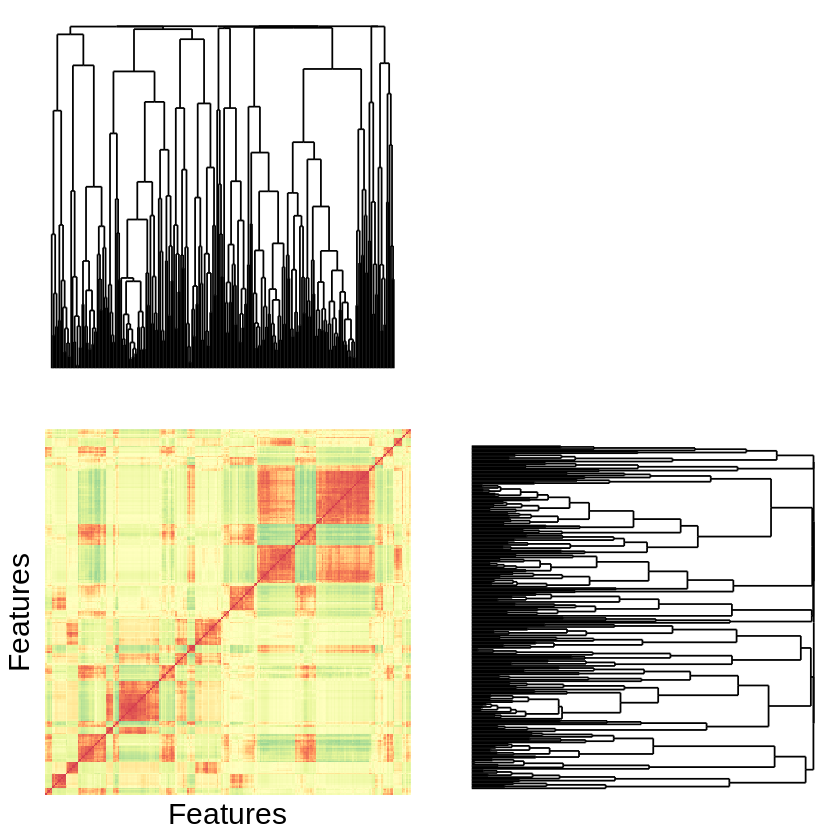

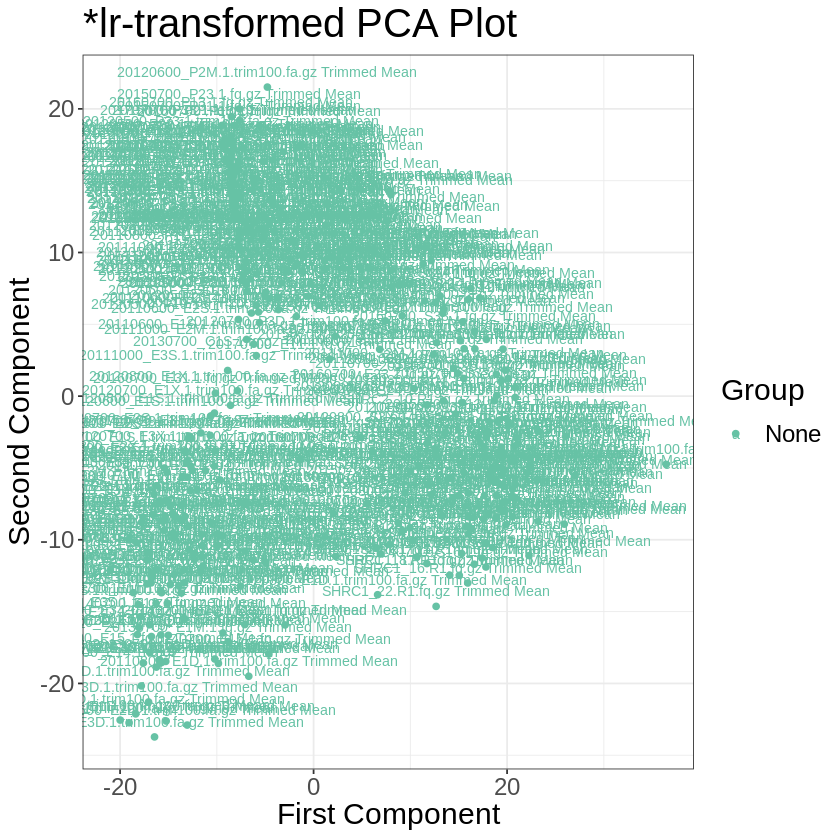

In [230]:
trimmed_propr_high <- propr(trimmed_abundances_ten, 
                            metric="rho", 
                            ivar="clr",
                            alpha=NA,
                            p=500,
                            )

# ~~~~~~~~~requires limma which is not available for R 4.0.1~~~~~~~~~~~~~~
# trimmed_propr_high <- propd(trimmed_abundances_p_ten, 
#                             rownames(trimmed_abundances_p_ten), 
#                             alpha=NA, 
#                             weighted=TRUE,
#                             p=100)

updateCutoffs(trimmed_propr_high,
              cutoff = seq(0, 0.01, .001), # cutoffs at which to estimate FDR
              ncores = 20) # parallelize here
best <- trimmed_propr_high[">", .999]
dendrogram(best)
pca(best)

tmp <- heatmaply_cor(trimmed_propr_high@matrix,
          xlab = "MAGs",
          ylab = "MAGs",
          file = "/srv/projects/abisko/rhys/01-projects/08-coevolution/00-abisko_coev/high_coverage_all_mag_proportionality_heatmap.html",
          k_row = 2, k_col = 2, plot_method="ggplot")

In [78]:
## PALSA ONLY

relative_cols_p <- c("Genome", relative_cols[grepl("_P", relative_cols)])
variance_cols_p <- c("Genome", variance_cols[grepl("_P", variance_cols)])
trimmed_cols_p <- c("Genome", trimmed_cols[grepl("_P", trimmed_cols)])
mean_cols_p <- c("Genome", mean_cols[grepl("_P", mean_cols)])

relative_abundances_p <- abundances[Genome %like% "_P", ..relative_cols_p]
variance_abundances_P <- abundances[Genome %like% "_P", ..variance_cols_p]
trimmed_abundances_p <- abundances[Genome %like% "_P", ..trimmed_cols_p]
mean_abundances_p <- abundances[Genome %like% "_P", ..mean_cols_p]

relative_abundances_p_t <- as.data.frame(t(relative_abundances_p[, !"Genome"]))
colnames(relative_abundances_p_t) <- relative_abundances_p$Genome
relative_cor_p <- as.data.frame(cor(scale(relative_abundances_p_t[-1])))
rownames(relative_cor_p) <- colnames(relative_cor_p)
relative_cor_p <- mutate_all(relative_cor_p , ~replace(., is.na(.), 0))
# relative_abundances[Genome!="unmapped"]

trimmed_abundances_p_t <- as.data.frame(t(trimmed_abundances_p[, !"Genome"]))
colnames(trimmed_abundances_p_t) <- trimmed_abundances_p$Genome
trimmed_cor_p <- as.data.frame(cor(scale(trimmed_abundances_p_t[-1])))
trimmed_cor_p <- mutate_all(trimmed_cor_p , ~replace(., is.na(.), 0))

In [198]:
## BOG ONLY

relative_cols_s <- c("Genome", relative_cols[grepl("_S", relative_cols)])
variance_cols_s <- c("Genome", variance_cols[grepl("_S", variance_cols)])
trimmed_cols_s <- c("Genome", trimmed_cols[grepl("_S", trimmed_cols)])
mean_cols_s <- c("Genome", mean_cols[grepl("_S", mean_cols)])

relative_abundances_s <- abundances[Genome %like% "_S", ..relative_cols_s]
variance_abundances_s <- abundances[Genome %like% "_S", ..variance_cols_s]
trimmed_abundances_s <- abundances[Genome %like% "_S", ..trimmed_cols_s]
mean_abundances_s <- abundances[Genome %like% "_S", ..mean_cols_s]

relative_abundances_s_t <- as.data.frame(t(relative_abundances_s[, !"Genome"]))
colnames(relative_abundances_s_t) <- relative_abundances_s$Genome
relative_cor_s <- as.data.frame(cor(scale(relative_abundances_s_t[-1])))
rownames(relative_cor_s) <- colnames(relative_cor_s)
relative_cor_s <- mutate_all(relative_cor_s , ~replace(., is.na(.), 0))
# relative_abundances[Genome!="unmapped"]

trimmed_abundances_s_t <- as.data.frame(t(trimmed_abundances_s[, !"Genome"]))
colnames(trimmed_abundances_s_t) <- trimmed_abundances_s$Genome
trimmed_cor_s <- as.data.frame(cor(scale(trimmed_abundances_s_t[-1])))
trimmed_cor_s <- mutate_all(trimmed_cor_s , ~replace(., is.na(.), 0))

### Palsa analysis of MAGs

In [123]:
## Palsa abundance plots
trimmed_abundances_palsa_melt <- as.data.table(melt(trimmed_abundances_p, id.vars=c("Genome")))[value>=5, ]
trimmed_abundances_palsa_melt %>% 
    filter(Genome %in% trimmed_abundances_palsa_melt[, .N>5, by=Genome][V1==TRUE, ]$Genome) -> trimmed_abundances_palsa_ten
trimmed_abundances_palsa_ten_table <- trimmed_abundances_p[Genome %in% trimmed_abundances_palsa_ten$Genome, ]

trimmed_abundances_p_ten <- as.data.frame(t(trimmed_abundances_palsa_ten_table[, !"Genome"]))
colnames(trimmed_abundances_p_ten) <- trimmed_abundances_palsa_ten_table$Genome
trimmed_cor_p_ten <- as.data.frame(cor(scale(trimmed_abundances_p_ten[-1])))
trimmed_cor_p_ten <- mutate_all(trimmed_cor_p_ten , ~replace(., is.na(.), 0))
rownames(trimmed_cor_p_ten) <- colnames(trimmed_cor_p_ten)


In [190]:
?propr

Alert: Replacing 0s with next smallest value.

Alert: Saving log-ratio transformed counts to @logratio.

Alert: Fixing permutations to active random seed.

Alert: Tabulating the presence of 0 counts.

Alert: Use '[' to index proportionality matrix.

Alert: Use 'updateCutoffs' to calculate FDR.



Not weighted and not alpha-transformed 
@counts summary: 112 subjects by 67 features
@logratio summary: 112 subjects by 67 features
@matrix summary: 67 features by 67 features
@pairs summary: index with `[` method
@fdr summary: iterations
   cutoff randcounts truecounts       FDR
1   0.000    957.124        978 0.9786544
2   0.001    948.420        977 0.9707472
3   0.002    939.638        976 0.9627439
4   0.003    931.116        974 0.9559713
5   0.004    922.314        974 0.9469343
6   0.005    913.556        974 0.9379425
7   0.006    905.044        972 0.9311152
8   0.007    896.522        971 0.9232976
9   0.008    888.086        970 0.9155526
10  0.009    879.786        970 0.9069959
11  0.010    871.064        969 0.8989309
See ?propr for object methods

Alert: Method failed to index any pairs.

Alert: Generating plot using all feature pairs.



'dendrogram' with 2 branches and 67 members total, at height 0.9997935 

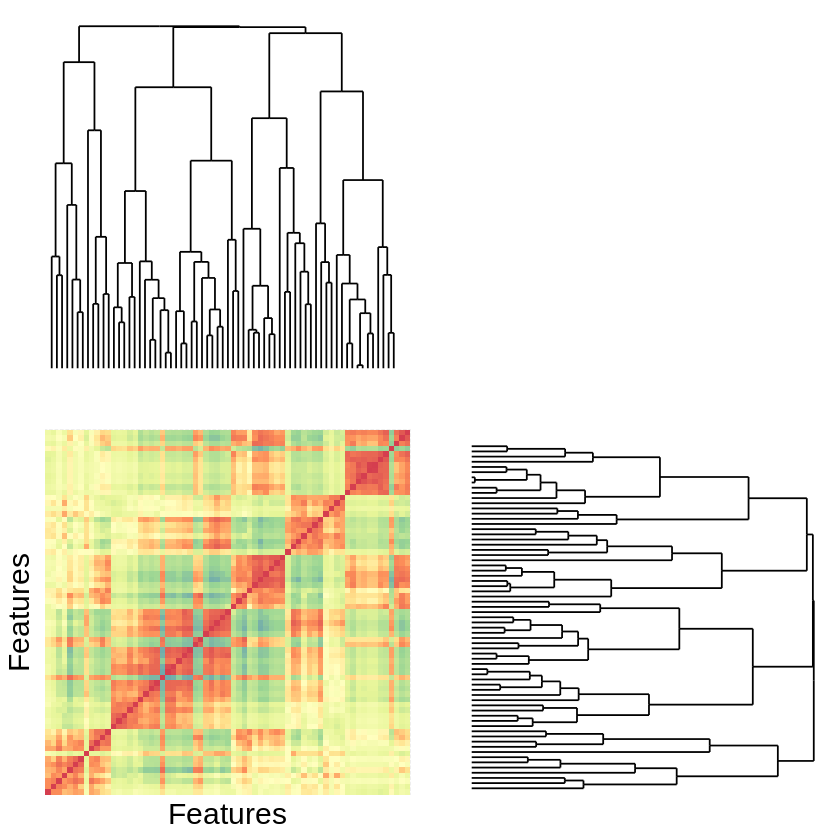

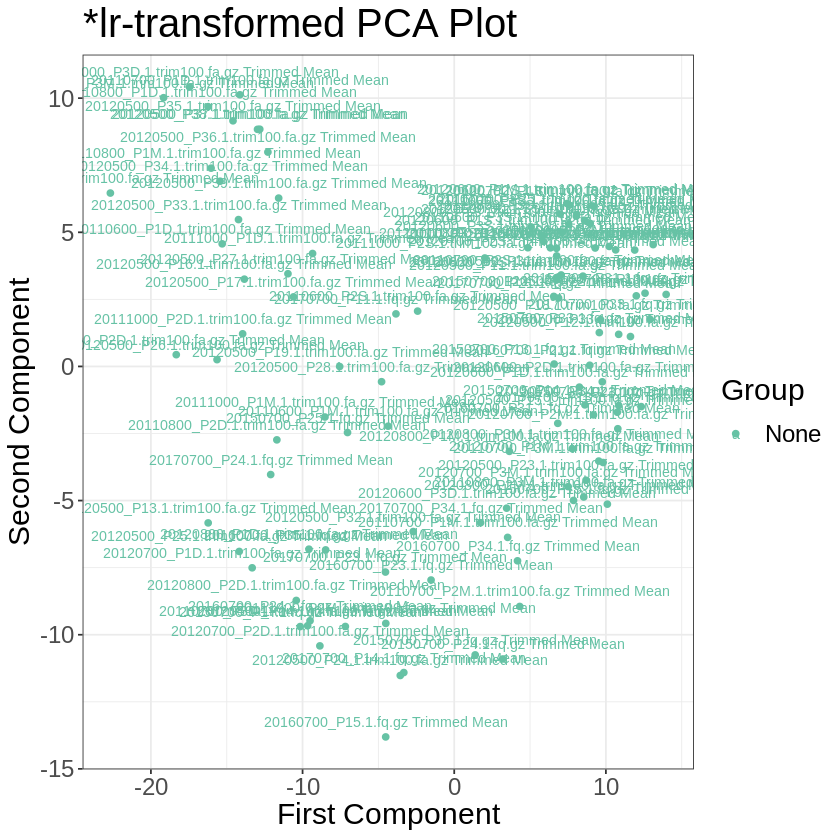

In [197]:
trimmed_propr_high <- propr(trimmed_abundances_p_ten, 
                            metric="rho", 
                            ivar="clr",
                            alpha=NA,
                            p=500,
                            )

# ~~~~~~~~~requires limma which is not available for R 4.0.1~~~~~~~~~~~~~~
# trimmed_propr_high <- propd(trimmed_abundances_p_ten, 
#                             rownames(trimmed_abundances_p_ten), 
#                             alpha=NA, 
#                             weighted=TRUE,
#                             p=100)

updateCutoffs(trimmed_propr_high,
              cutoff = seq(0, 0.01, .001), # cutoffs at which to estimate FDR
              ncores = 20) # parallelize here
best <- trimmed_propr_high[">", .999]
dendrogram(best)
pca(best)

tmp <- heatmaply_cor(trimmed_propr_high@matrix,
          xlab = "MAGs",
          ylab = "MAGs",
          file = "/srv/projects/abisko/rhys/01-projects/08-coevolution/00-abisko_coev/high_coverage_palsa_mag_proportionality_heatmap.html",
          k_row = 2, k_col = 2, plot_method="ggplot")

#### Palsa Plots

In [143]:

## Only MAGs that have more than 10 samples
palsa_plot <- ggplot(trimmed_abundances_palsa_ten) +
                geom_point(aes(x=variable, y=value)) +
                facet_wrap(~Genome)

tmp <- heatmaply_cor(trimmed_cor_p_ten,
          xlab = "MAGs",
          ylab = "MAGs",
          file = "/srv/projects/abisko/rhys/01-projects/08-coevolution/00-abisko_coev/high_coverage_palsa_mag_cor_heatmap.html",
          k_row = 2, k_col = 2, plot_method="ggplot")

# ggsave("/srv/projects/abisko/rhys/01-projects/08-coevolution/00-abisko_coev/trimmed_means_palsa.png", plot = palsa_plot, width=12, height=12)

# Bog Coabundance

In [199]:
## Bog abundance plots
trimmed_abundances_bog_melt <- as.data.table(melt(trimmed_abundances_s, id.vars=c("Genome")))[value>=5, ]
trimmed_abundances_bog_melt %>% 
    filter(Genome %in% trimmed_abundances_bog_melt[, .N>5, by=Genome][V1==TRUE, ]$Genome) -> trimmed_abundances_bog_ten
trimmed_abundances_bog_ten_table <- trimmed_abundances_s[Genome %in% trimmed_abundances_bog_ten$Genome, ]

trimmed_abundances_s_ten <- as.data.frame(t(trimmed_abundances_bog_ten_table[, !"Genome"]))
colnames(trimmed_abundances_s_ten) <- trimmed_abundances_bog_ten_table$Genome
trimmed_cor_s_ten <- as.data.frame(cor(scale(trimmed_abundances_s_ten[-1])))
trimmed_cor_s_ten <- mutate_all(trimmed_cor_s_ten , ~replace(., is.na(.), 0))
rownames(trimmed_cor_s_ten) <- colnames(trimmed_cor_s_ten)

Alert: Replacing 0s with next smallest value.

Alert: Saving log-ratio transformed counts to @logratio.

Alert: Fixing permutations to active random seed.

Alert: Tabulating the presence of 0 counts.

Alert: Use '[' to index proportionality matrix.

Alert: Use 'updateCutoffs' to calculate FDR.



Not weighted and not alpha-transformed 
@counts summary: 127 subjects by 83 features
@logratio summary: 127 subjects by 83 features
@matrix summary: 83 features by 83 features
@pairs summary: index with `[` method
@fdr summary: iterations
   cutoff randcounts truecounts       FDR
1   0.000   1518.560       1693 0.8969640
2   0.001   1503.972       1691 0.8893980
3   0.002   1489.582       1688 0.8824538
4   0.003   1475.110       1685 0.8754362
5   0.004   1460.602       1682 0.8683722
6   0.005   1446.134       1678 0.8618200
7   0.006   1431.518       1674 0.8551481
8   0.007   1417.430       1669 0.8492690
9   0.008   1403.108       1667 0.8416965
10  0.009   1388.964       1665 0.8342126
11  0.010   1374.670       1663 0.8266206
See ?propr for object methods

Alert: Method failed to index any pairs.

Alert: Generating plot using all feature pairs.



'dendrogram' with 2 branches and 83 members total, at height 0.9998474 

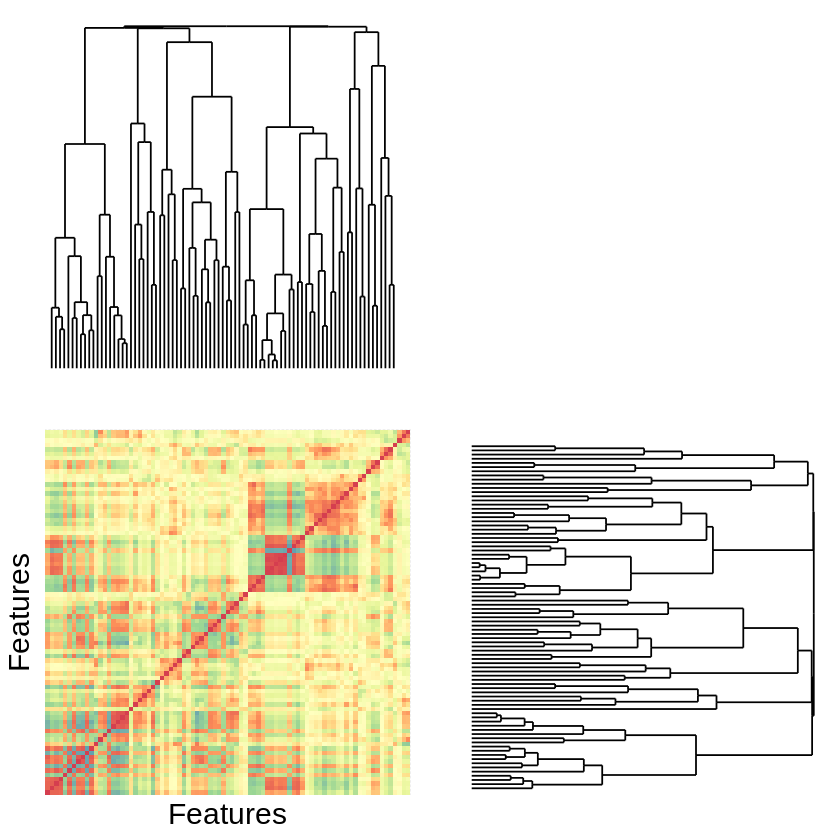

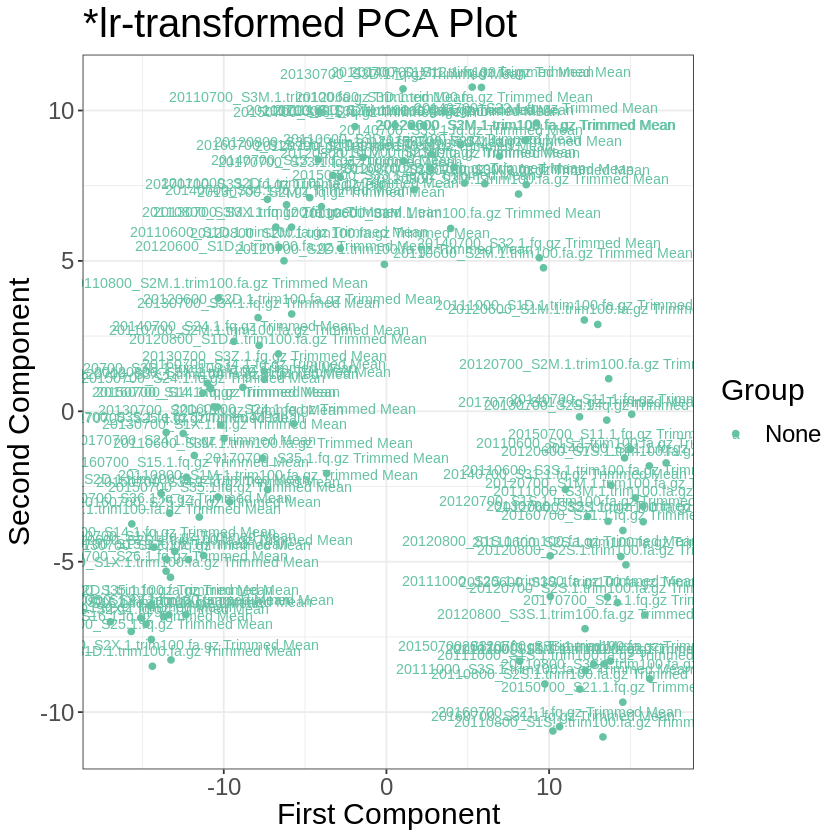

In [200]:
trimmed_propr_high_bog <- propr(trimmed_abundances_s_ten, 
                            metric="rho", 
                            ivar="clr",
                            alpha=NA,
                            p=500,
                            )

# ~~~~~~~~~requires limma which is not available for R 4.0.1~~~~~~~~~~~~~~
# trimmed_propr_high <- propd(trimmed_abundances_p_ten, 
#                             rownames(trimmed_abundances_p_ten), 
#                             alpha=NA, 
#                             weighted=TRUE,
#                             p=100)

updateCutoffs(trimmed_propr_high_bog,
              cutoff = seq(0, 0.01, .001), # cutoffs at which to estimate FDR
              ncores = 20) # parallelize here
best <- trimmed_propr_high_bog[">", .999]
dendrogram(best)
pca(best)

tmp <- heatmaply_cor(trimmed_propr_high_bog@matrix,
          xlab = "MAGs",
          ylab = "MAGs",
          file = "/srv/projects/abisko/rhys/01-projects/08-coevolution/00-abisko_coev/high_coverage_bog_mag_proportionality_heatmap.html",
          k_row = 2, k_col = 2, plot_method="ggplot")

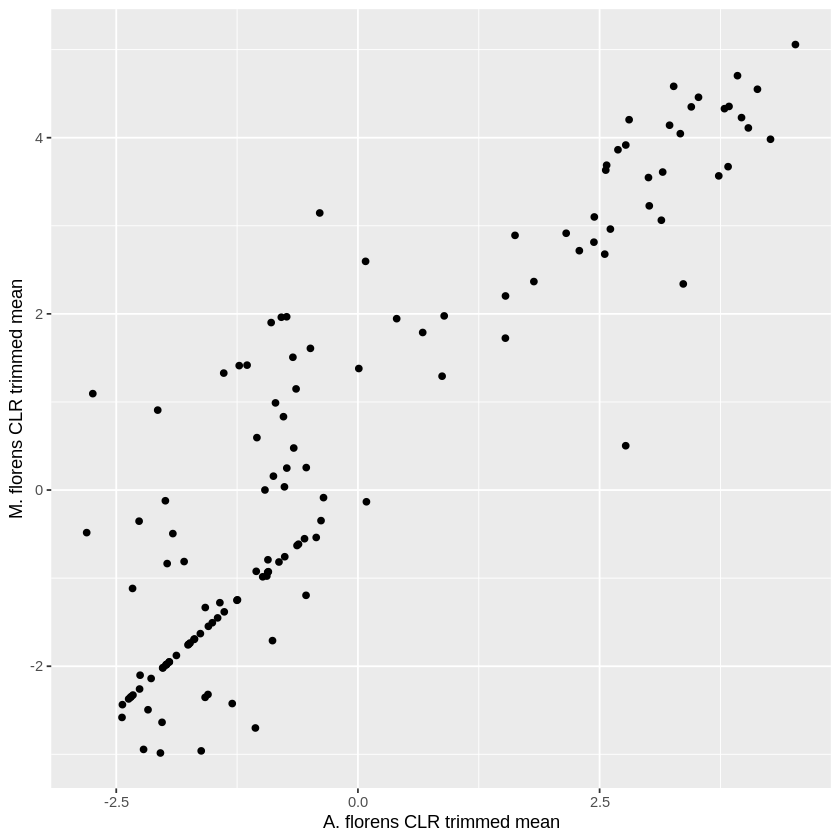

In [209]:
# trimmed_propr_high_bog@logratio

ggplot(data=trimmed_propr_high_bog@logratio) + 
    geom_point(aes(x=trimmed_propr_high_bog@logratio$`73.20110700_S2D.20.renamed_contigs`, 
                   y=trimmed_propr_high_bog@logratio$`73.20110600_S2D.10.renamed_contigs`)) +
    xlab("A. florens CLR trimmed mean") +
    ylab("M. florens CLR trimmed mean")

In [224]:
## Splitting mags and samples up by core depth
trimmed_abundances_bog_shallow <- trimmed_abundances_bog_ten_table[Genome %like% "*_S.S\\.", ]
trimmed_abundances_bog_shallow_for_propr <- as.data.frame(t(trimmed_abundances_bog_shallow[, !"Genome"]))
colnames(trimmed_abundances_bog_shallow_for_propr) <- trimmed_abundances_bog_shallow$Genome

trimmed_abundances_bog_medium <- trimmed_abundances_bog_ten_table[Genome %like% "*_S.M\\.", ]
trimmed_abundances_bog_medium_for_propr <- as.data.frame(t(trimmed_abundances_bog_medium[, !"Genome"]))
colnames(trimmed_abundances_bog_medium_for_propr) <- trimmed_abundances_bog_medium$Genome

trimmed_abundances_bog_deep <- trimmed_abundances_bog_ten_table[Genome %like% "*_S.D\\.", ]
trimmed_abundances_bog_deep_for_propr <- as.data.frame(t(trimmed_abundances_bog_deep[, !"Genome"]))
colnames(trimmed_abundances_bog_deep_for_propr) <- trimmed_abundances_bog_deep$Genome

Alert: Replacing 0s with next smallest value.

Alert: Saving log-ratio transformed counts to @logratio.

Alert: Fixing permutations to active random seed.

Alert: Tabulating the presence of 0 counts.

Alert: Use '[' to index proportionality matrix.

Alert: Use 'updateCutoffs' to calculate FDR.



Not weighted and not alpha-transformed 
@counts summary: 127 subjects by 10 features
@logratio summary: 127 subjects by 10 features
@matrix summary: 10 features by 10 features
@pairs summary: index with `[` method
@fdr summary: iterations
   cutoff randcounts truecounts       FDR
1   0.000      6.636         17 0.3903529
2   0.001      6.536         17 0.3844706
3   0.002      6.452         17 0.3795294
4   0.003      6.350         17 0.3735294
5   0.004      6.268         17 0.3687059
6   0.005      6.206         17 0.3650588
7   0.006      6.112         17 0.3595294
8   0.007      6.034         17 0.3549412
9   0.008      5.962         16 0.3726250
10  0.009      5.898         16 0.3686250
11  0.010      5.806         16 0.3628750
See ?propr for object methods

Alert: Method failed to index any pairs.

Alert: Generating plot using all feature pairs.



'dendrogram' with 2 branches and 10 members total, at height 0.9922886 

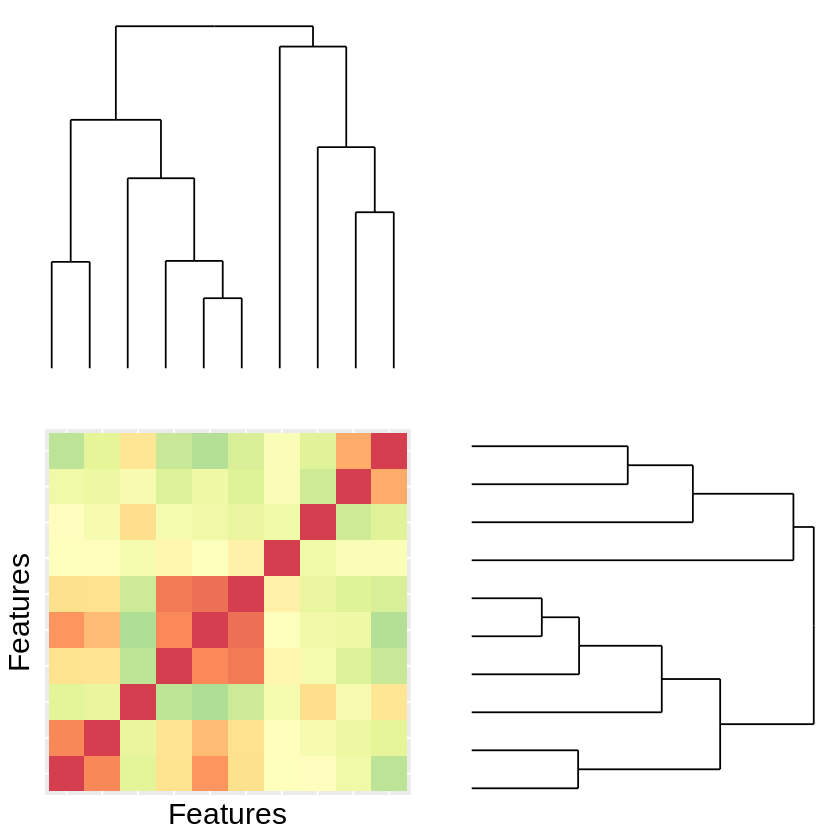

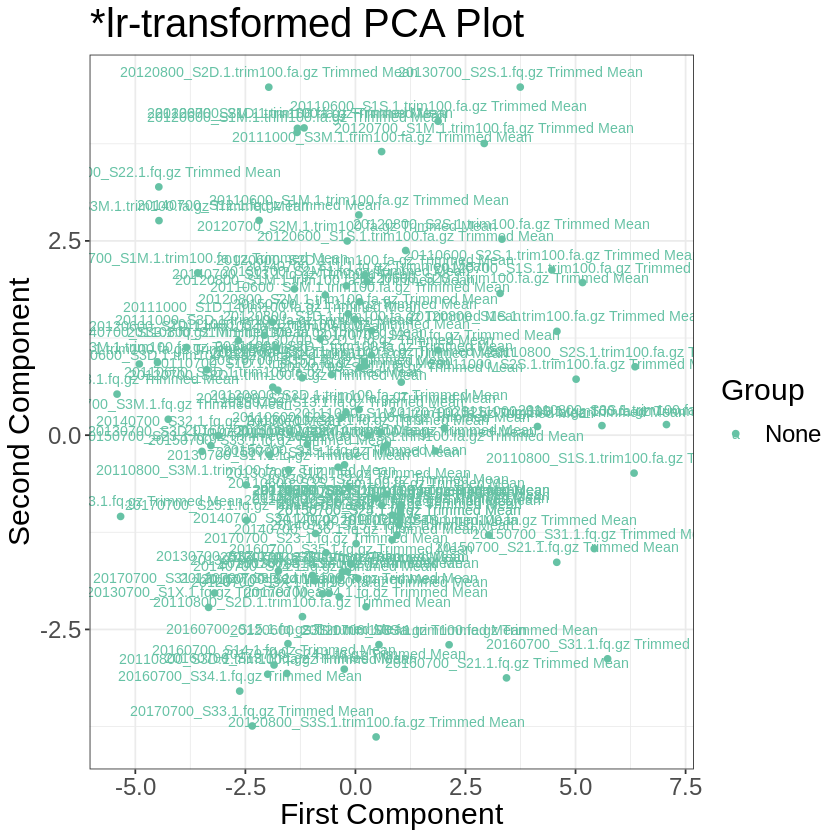

In [226]:
### Propr Shallow ####
trimmed_propr_bog_shallow <- propr(trimmed_abundances_bog_shallow_for_propr, 
                            metric="rho", 
                            ivar="clr",
                            alpha=NA,
                            p=500,
                            )

# ~~~~~~~~~requires limma which is not available for R 4.0.1~~~~~~~~~~~~~~
# trimmed_propr_high <- propd(trimmed_abundances_p_ten, 
#                             rownames(trimmed_abundances_p_ten), 
#                             alpha=NA, 
#                             weighted=TRUE,
#                             p=100)

updateCutoffs(trimmed_propr_bog_shallow,
              cutoff = seq(0, 0.01, .001), # cutoffs at which to estimate FDR
              ncores = 20) # parallelize here
best <- trimmed_propr_bog_shallow[">", .999]
dendrogram(best)
pca(best)

tmp <- heatmaply_cor(trimmed_propr_bog_shallow@matrix,
          xlab = "MAGs",
          ylab = "MAGs",
          file = "/srv/projects/abisko/rhys/01-projects/08-coevolution/00-abisko_coev/bog_shallow_mag_proportionality_heatmap.html",
          k_row = 2, k_col = 2, plot_method="ggplot")




Alert: Replacing 0s with next smallest value.

Alert: Saving log-ratio transformed counts to @logratio.

Alert: Fixing permutations to active random seed.

Alert: Tabulating the presence of 0 counts.

Alert: Use '[' to index proportionality matrix.

Alert: Use 'updateCutoffs' to calculate FDR.



Not weighted and not alpha-transformed 
@counts summary: 127 subjects by 24 features
@logratio summary: 127 subjects by 24 features
@matrix summary: 24 features by 24 features
@pairs summary: index with `[` method
@fdr summary: iterations
   cutoff randcounts truecounts       FDR
1   0.000     88.102        125 0.7048160
2   0.001     87.010        125 0.6960800
3   0.002     85.962        124 0.6932419
4   0.003     84.878        124 0.6845000
5   0.004     83.906        124 0.6766613
6   0.005     82.932        124 0.6688065
7   0.006     81.914        124 0.6605968
8   0.007     80.828        124 0.6518387
9   0.008     79.802        124 0.6435645
10  0.009     78.818        124 0.6356290
11  0.010     77.736        124 0.6269032
See ?propr for object methods

Alert: Method failed to index any pairs.

Alert: Generating plot using all feature pairs.



'dendrogram' with 2 branches and 24 members total, at height 0.9984769 

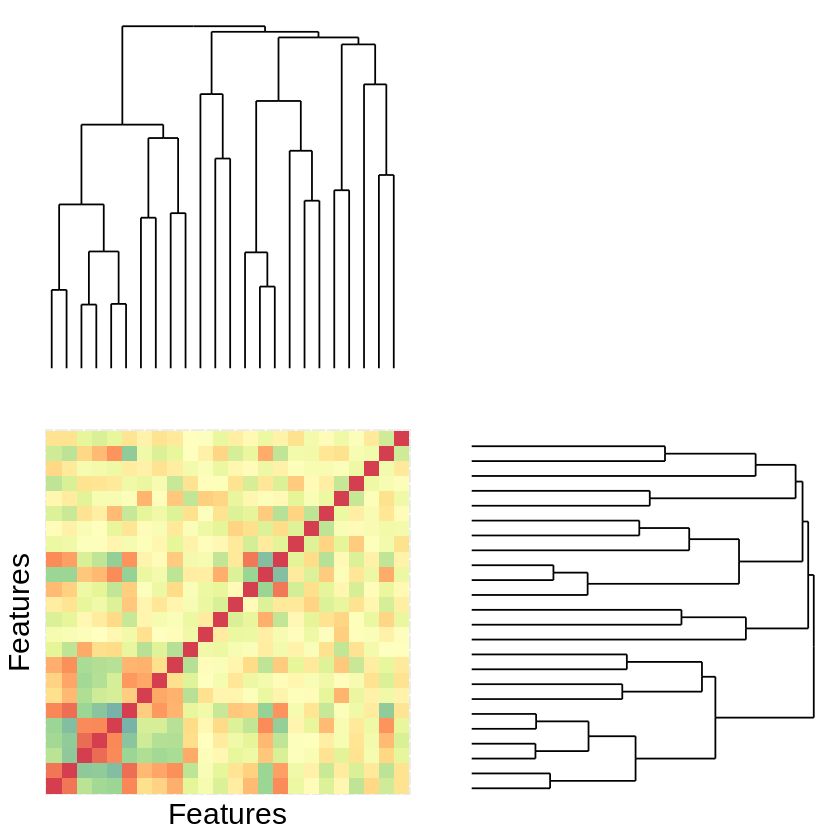

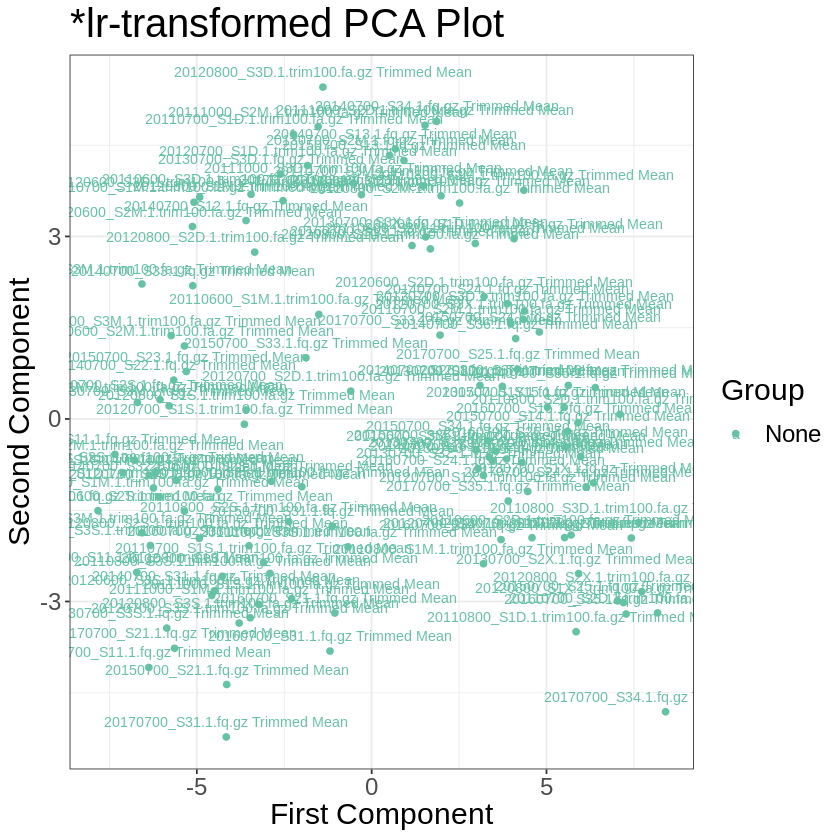

In [227]:
### Propr Medium ####
trimmed_propr_bog_medium <- propr(trimmed_abundances_bog_medium_for_propr, 
                            metric="rho", 
                            ivar="clr",
                            alpha=NA,
                            p=500,
                            )

# ~~~~~~~~~requires limma which is not available for R 4.0.1~~~~~~~~~~~~~~
# trimmed_propr_high <- propd(trimmed_abundances_p_ten, 
#                             rownames(trimmed_abundances_p_ten), 
#                             alpha=NA, 
#                             weighted=TRUE,
#                             p=100)

updateCutoffs(trimmed_propr_bog_medium,
              cutoff = seq(0, 0.01, .001), # cutoffs at which to estimate FDR
              ncores = 20) # parallelize here
best <- trimmed_propr_bog_medium[">", .999]
dendrogram(best)
pca(best)

tmp <- heatmaply_cor(trimmed_propr_bog_medium@matrix,
          xlab = "MAGs",
          ylab = "MAGs",
          file = "/srv/projects/abisko/rhys/01-projects/08-coevolution/00-abisko_coev/bog_medium_mag_proportionality_heatmap.html",
          k_row = 2, k_col = 2, plot_method="ggplot")

Alert: Replacing 0s with next smallest value.

Alert: Saving log-ratio transformed counts to @logratio.

Alert: Fixing permutations to active random seed.

Alert: Tabulating the presence of 0 counts.

Alert: Use '[' to index proportionality matrix.

Alert: Use 'updateCutoffs' to calculate FDR.



Not weighted and not alpha-transformed 
@counts summary: 127 subjects by 48 features
@logratio summary: 127 subjects by 48 features
@matrix summary: 48 features by 48 features
@pairs summary: index with `[` method
@fdr summary: iterations
   cutoff randcounts truecounts       FDR
1   0.000    465.166        545 0.8535156
2   0.001    460.832        545 0.8455633
3   0.002    456.320        545 0.8372844
4   0.003    451.894        544 0.8306875
5   0.004    447.374        543 0.8238932
6   0.005    442.862        542 0.8170886
7   0.006    438.540        541 0.8106100
8   0.007    433.998        539 0.8051911
9   0.008    429.582        537 0.7999665
10  0.009    425.110        536 0.7931157
11  0.010    420.778        536 0.7850336
See ?propr for object methods

Alert: Method failed to index any pairs.

Alert: Generating plot using all feature pairs.



'dendrogram' with 2 branches and 48 members total, at height 0.9997134 

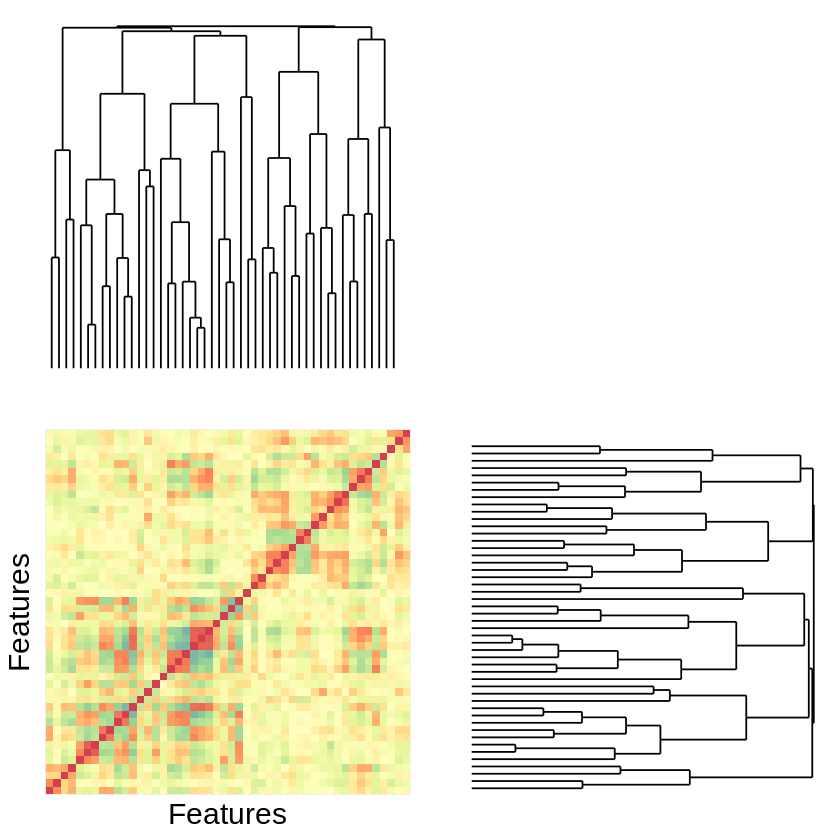

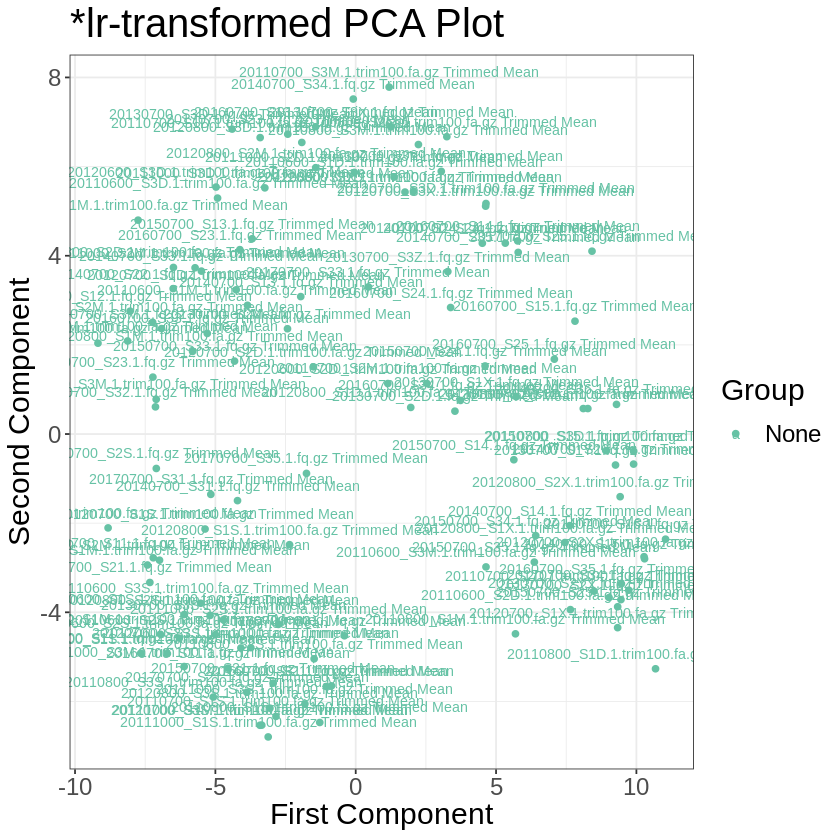

In [228]:
### Propr High ####
trimmed_propr_bog_deep <- propr(trimmed_abundances_bog_deep_for_propr, 
                            metric="rho", 
                            ivar="clr",
                            alpha=NA,
                            p=500,
                            )

# ~~~~~~~~~requires limma which is not available for R 4.0.1~~~~~~~~~~~~~~
# trimmed_propr_high <- propd(trimmed_abundances_p_ten, 
#                             rownames(trimmed_abundances_p_ten), 
#                             alpha=NA, 
#                             weighted=TRUE,
#                             p=100)

updateCutoffs(trimmed_propr_bog_deep,
              cutoff = seq(0, 0.01, .001), # cutoffs at which to estimate FDR
              ncores = 20) # parallelize here
best <- trimmed_propr_bog_deep[">", .999]
dendrogram(best)
pca(best)

tmp <- heatmaply_cor(trimmed_propr_bog_deep@matrix,
          xlab = "MAGs",
          ylab = "MAGs",
          file = "/srv/projects/abisko/rhys/01-projects/08-coevolution/00-abisko_coev/bog_deep_mag_proportionality_heatmap.html",
          k_row = 2, k_col = 2, plot_method="ggplot")

# SHRC Coabundance analysis

In [181]:
## SHRC ONLY
shrc_abundances <- fread("/srv/projects/abisko/eilish/mapping/shrc_derep_coverage.tsv")

relative_cols_shrc <- c("Genome", colnames(shrc_abundances)[grepl("Relative", colnames(shrc_abundances))])
variance_cols_shrc <- c("Genome", colnames(shrc_abundances)[grepl("Variance", colnames(shrc_abundances))])
trimmed_cols_shrc <- c("Genome", colnames(shrc_abundances)[grepl("Trimmed", colnames(shrc_abundances))])

## Get only the SHRC MAGs
relative_abundances_shrc <- shrc_abundances[Genome %like% "SH", ..relative_cols_shrc]
variance_abundances_shrc <- shrc_abundances[Genome %like% "SH", ..variance_cols_shrc]
trimmed_abundances_shrc  <- shrc_abundances[Genome %like% "SH", ..trimmed_cols_shrc]



## For each mag, return only the samples where that MAG is present i.e. > 1
shrc_melt <- as.data.table(melt(trimmed_abundances_shrc, id.vars=c("Genome")))[value>=5, ]

## Return only the mags that are present in more 5 or more samples
shrc_melt %>% 
    filter(Genome %in% shrc_melt[, .N>5, by=Genome][V1==TRUE, ]$Genome) -> shrc_five
shrc_five_table <- trimmed_abundances_shrc[Genome %in% shrc_five$Genome, ]

shrc_five <- as.data.frame(t(shrc_five_table[, !"Genome"]))

colnames(shrc_five) <- shrc_five_table$Genome
shrc_five_cor <- as.data.frame(cor(scale(shrc_five[-1])))
shrc_five_cor <- mutate_all(shrc_five_cor , ~replace(., is.na(.), 0))
rownames(shrc_five_cor) <- colnames(shrc_five_cor)



Alert: Replacing 0s with next smallest value.

Alert: Saving log-ratio transformed counts to @logratio.

Alert: Fixing permutations to active random seed.

Alert: Tabulating the presence of 0 counts.

Alert: Use '[' to index proportionality matrix.

Alert: Use 'updateCutoffs' to calculate FDR.



Not weighted and not alpha-transformed 
@counts summary: 25 subjects by 33 features
@logratio summary: 25 subjects by 33 features
@matrix summary: 33 features by 33 features
@pairs summary: index with `[` method
@fdr summary: iterations
  cutoff randcounts truecounts       FDR
1   0.00    231.236        253 0.9139763
2   0.01    221.752        252 0.8799683
3   0.02    212.500        246 0.8638211
4   0.03    203.592        242 0.8412893
5   0.04    194.600        237 0.8210970
6   0.05    185.772        235 0.7905191
See ?propr for object methods

Alert: Generating plot using all feature pairs.



'dendrogram' with 2 branches and 33 members total, at height 0.9987416 

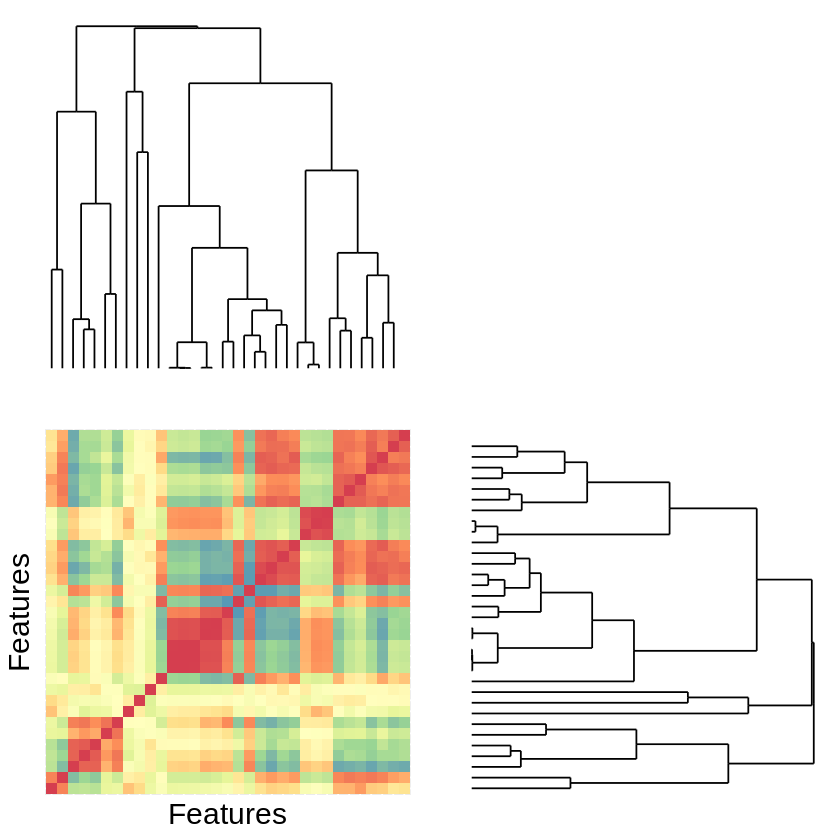

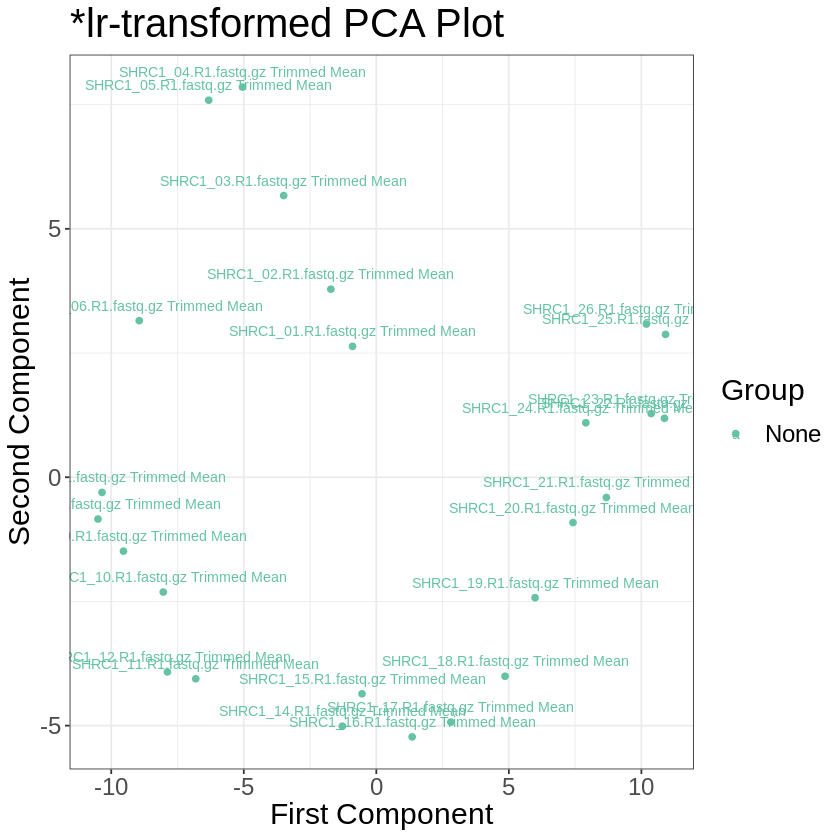

In [175]:
shrc_propr_high <- propr(shrc_five, 
                            metric="rho", 
                            ivar="clr",
                            alpha=NA,
                            p=500,
                            )

# ~~~~~~~~~requires limma which is not available for R 4.0.1~~~~~~~~~~~~~~
# trimmed_propr_high <- propd(trimmed_abundances_p_ten, 
#                             rownames(trimmed_abundances_p_ten), 
#                             alpha=NA, 
#                             weighted=TRUE,
#                             p=100)

updateCutoffs(shrc_propr_high,
              cutoff = seq(0, 0.05, .01), # cutoffs at which to estimate FDR
              ncores = 20) # parallelize here
best <- shrc_propr_high[">", .95]
dendrogram(shrc_propr_high)
pca(shrc_propr_high)

tmp <- heatmaply_cor(shrc_propr_high@matrix,
          xlab = "MAGs",
          ylab = "MAGs",
          file = "/srv/projects/abisko/rhys/01-projects/08-coevolution/00-abisko_coev/high_coverage_shrc_mag_proportionality_heatmap.html",
          k_row = 2, k_col = 2, plot_method="ggplot")

In [3]:
library(data.table)
library(propr)

## SHRC ONLY
shrc_abundances <- fread("/work/microbiome/abisko/eilish/mapping/shrc_derep_coverage.tsv")

relative_cols_shrc <- c("Genome", colnames(shrc_abundances)[grepl("Relative", colnames(shrc_abundances))])
variance_cols_shrc <- c("Genome", colnames(shrc_abundances)[grepl("Variance", colnames(shrc_abundances))])
trimmed_cols_shrc <- c("Genome", colnames(shrc_abundances)[grepl("Trimmed", colnames(shrc_abundances))])

## Get only the SHRC MAGs
relative_abundances_shrc <- shrc_abundances[Genome %like% "SH", ..relative_cols_shrc]
variance_abundances_shrc <- shrc_abundances[Genome %like% "SH", ..variance_cols_shrc]
trimmed_abundances_shrc  <- shrc_abundances[Genome %like% "SH", ..trimmed_cols_shrc]

wanted_genomes_set1 <- c("SHRC1_15_bin_28", "SHRC1_18_bin_38") 
wanted_genomes_set2 <- c("SHRC1_24_bin_41", "SHRC1_18_bin_38")
shrc_set1 <- trimmed_abundances_shrc[Genome %in% wanted_genomes_set1,]
shrc_set2 <- trimmed_abundances_shrc[Genome %in% wanted_genomes_set2,]

shrc_set1
shrc_set2

# ~~~~~~~~~~~~~~~~~~~~~~ Propr on Set1 ~~~~~~~~~~~~~~~~~~~~~~~~~
shrc_propr_set1 <- propr(shrc_set1[, !c("Genome")], 
                            metric="rho", 
                            ivar="clr",
                            alpha=NA,
                            p=500,
                            )


## Set 1 Matrix

apply(shrc_propr_set1@matrix, MARGIN = 2, FUN = function(X) (X - min(X))/diff(range(X)))

# ~~~~~~~~~~~~~~~~~~~~~~ Propr on Set2 ~~~~~~~~~~~~~~~~~~~~~~~~~
shrc_propr_set2 <- propr(shrc_set2[, !c("Genome")], 
                            metric="rho", 
                            ivar="clr",
                            alpha=NA,
                            p=500,
                            )


## Set 1 Matrix
apply(shrc_propr_set2@matrix, MARGIN = 2, FUN = function(X) (X - min(X))/diff(range(X)))

Genome,SHRC1_01.R1.fastq.gz Trimmed Mean,SHRC1_02.R1.fastq.gz Trimmed Mean,SHRC1_03.R1.fastq.gz Trimmed Mean,SHRC1_04.R1.fastq.gz Trimmed Mean,SHRC1_05.R1.fastq.gz Trimmed Mean,SHRC1_06.R1.fastq.gz Trimmed Mean,SHRC1_07.R1.fastq.gz Trimmed Mean,SHRC1_08.R1.fastq.gz Trimmed Mean,SHRC1_09.R1.fastq.gz Trimmed Mean,...,SHRC1_17.R1.fastq.gz Trimmed Mean,SHRC1_18.R1.fastq.gz Trimmed Mean,SHRC1_19.R1.fastq.gz Trimmed Mean,SHRC1_20.R1.fastq.gz Trimmed Mean,SHRC1_21.R1.fastq.gz Trimmed Mean,SHRC1_22.R1.fastq.gz Trimmed Mean,SHRC1_23.R1.fastq.gz Trimmed Mean,SHRC1_24.R1.fastq.gz Trimmed Mean,SHRC1_25.R1.fastq.gz Trimmed Mean,SHRC1_26.R1.fastq.gz Trimmed Mean
SHRC1_15_bin_28,0,0,0,0,0.2010981,0.3536694,0.466015,0.7671840,1.0102087,...,41.20724,47.51398,6.504794,3.739161,7.712014,7.944347,6.450205,9.059710,12.605674,14.75160
SHRC1_18_bin_38,0,0,0,0,0.0000000,0.0000000,0.000000,0.2593745,0.1254565,...,37.04954,31.76259,3.606027,1.575949,3.656503,5.289052,2.764702,5.340761,7.112783,10.61633


Genome,SHRC1_01.R1.fastq.gz Trimmed Mean,SHRC1_02.R1.fastq.gz Trimmed Mean,SHRC1_03.R1.fastq.gz Trimmed Mean,SHRC1_04.R1.fastq.gz Trimmed Mean,SHRC1_05.R1.fastq.gz Trimmed Mean,SHRC1_06.R1.fastq.gz Trimmed Mean,SHRC1_07.R1.fastq.gz Trimmed Mean,SHRC1_08.R1.fastq.gz Trimmed Mean,SHRC1_09.R1.fastq.gz Trimmed Mean,...,SHRC1_17.R1.fastq.gz Trimmed Mean,SHRC1_18.R1.fastq.gz Trimmed Mean,SHRC1_19.R1.fastq.gz Trimmed Mean,SHRC1_20.R1.fastq.gz Trimmed Mean,SHRC1_21.R1.fastq.gz Trimmed Mean,SHRC1_22.R1.fastq.gz Trimmed Mean,SHRC1_23.R1.fastq.gz Trimmed Mean,SHRC1_24.R1.fastq.gz Trimmed Mean,SHRC1_25.R1.fastq.gz Trimmed Mean,SHRC1_26.R1.fastq.gz Trimmed Mean
SHRC1_18_bin_38,0,0,0,0,0,0,0,0.2593745,0.1254565,...,37.04954,31.76259,3.606027,1.5759493,3.656503,5.289052,2.764702,5.340761,7.112783,10.616333
SHRC1_24_bin_41,0,0,0,0,0,0,0,0.0000000,0.0000000,...,0.00000,0.00000,0.000000,0.2422063,2.236005,45.814760,26.736800,19.330210,6.498901,4.769766


Alert: Replacing 0s with next smallest value.
Alert: Saving log-ratio transformed counts to @logratio.
Alert: Fixing permutations to active random seed.
Alert: Tabulating the presence of 0 counts.
Alert: Use '[' to index proportionality matrix.
Alert: Use 'updateCutoffs' to calculate FDR.


,SHRC1_01.R1.fastq.gz Trimmed Mean,SHRC1_02.R1.fastq.gz Trimmed Mean,SHRC1_03.R1.fastq.gz Trimmed Mean,SHRC1_04.R1.fastq.gz Trimmed Mean,SHRC1_05.R1.fastq.gz Trimmed Mean,SHRC1_06.R1.fastq.gz Trimmed Mean,SHRC1_07.R1.fastq.gz Trimmed Mean,SHRC1_08.R1.fastq.gz Trimmed Mean,SHRC1_09.R1.fastq.gz Trimmed Mean,SHRC1_10.R1.fastq.gz Trimmed Mean,...,SHRC1_17.R1.fastq.gz Trimmed Mean,SHRC1_18.R1.fastq.gz Trimmed Mean,SHRC1_19.R1.fastq.gz Trimmed Mean,SHRC1_20.R1.fastq.gz Trimmed Mean,SHRC1_21.R1.fastq.gz Trimmed Mean,SHRC1_22.R1.fastq.gz Trimmed Mean,SHRC1_23.R1.fastq.gz Trimmed Mean,SHRC1_24.R1.fastq.gz Trimmed Mean,SHRC1_25.R1.fastq.gz Trimmed Mean,SHRC1_26.R1.fastq.gz Trimmed Mean
SHRC1_01.R1.fastq.gz Trimmed Mean,1.000000000,1.000000000,1.000000000,1.000000000,0.1629672436,0.002944145,0.008828905,0.0999392324,0.01174008,0.01394385,...,0.993629114,0.870793474,0.680006753,0.314961316,0.19009476,0.867510634,0.334484607,0.7454712516,0.70108440,0.92053884
SHRC1_02.R1.fastq.gz Trimmed Mean,1.000000000,1.000000000,1.000000000,1.000000000,0.1629672436,0.002944145,0.008828905,0.0999392324,0.01174008,0.01394385,...,0.993629114,0.870793474,0.680006753,0.314961316,0.19009476,0.867510634,0.334484607,0.7454712516,0.70108440,0.92053884
SHRC1_03.R1.fastq.gz Trimmed Mean,1.000000000,1.000000000,1.000000000,1.000000000,0.1629672436,0.002944145,0.008828905,0.0999392324,0.01174008,0.01394385,...,0.993629114,0.870793474,0.680006753,0.314961316,0.19009476,0.867510634,0.334484607,0.7454712516,0.70108440,0.92053884
SHRC1_04.R1.fastq.gz Trimmed Mean,1.000000000,1.000000000,1.000000000,1.000000000,0.1629672436,0.002944145,0.008828905,0.0999392324,0.01174008,0.01394385,...,0.993629114,0.870793474,0.680006753,0.314961316,0.19009476,0.867510634,0.334484607,0.7454712516,0.70108440,0.92053884
SHRC1_05.R1.fastq.gz Trimmed Mean,0.162491528,0.162491528,0.162491528,0.162491528,1.0000000000,0.796163709,0.723640838,0.9832335207,0.67068596,0.59000694,...,0.107234414,0.002863541,0.105392528,0.901255678,0.35182955,0.001210321,0.869330314,0.0000000000,0.07464089,0.02836171
SHRC1_06.R1.fastq.gz Trimmed Mean,0.000000000,0.000000000,0.000000000,0.000000000,0.7956779366,1.000000000,0.979835449,0.8610344507,0.94297429,0.86159253,...,0.000000000,0.163394922,0.343290528,0.660786223,0.27354734,0.165963882,0.641338978,0.2578002326,0.32265591,0.11248221
SHRC1_07.R1.fastq.gz Trimmed Mean,0.038055047,0.038055047,0.038055047,0.038055047,0.7319420421,0.980487647,1.000000000,0.7911194204,0.98962557,0.93734411,...,0.054695796,0.231352997,0.380671437,0.622460852,0.26401230,0.233668802,0.607088365,0.3101557944,0.36431988,0.18308895
SHRC1_08.R1.fastq.gz Trimmed Mean,0.097120206,0.097120206,0.097120206,0.097120206,0.9831905608,0.861009621,0.784099040,1.0000000000,0.72661121,0.63867277,...,0.043944466,0.000000000,0.170513684,0.836345427,0.32506494,0.000000000,0.804178897,0.0527419507,0.13808793,0.00000000
SHRC1_09.R1.fastq.gz Trimmed Mean,0.080010133,0.080010133,0.080010133,0.080010133,0.6936094603,0.947069977,0.990048818,0.7462918214,1.00000000,0.97660227,...,0.102913735,0.273612330,0.401586365,0.600988566,0.25879672,0.275637296,0.588005303,0.3402080366,0.38778129,0.22989435
SHRC1_10.R1.fastq.gz Trimmed Mean,0.150885938,0.150885938,0.150885938,0.150885938,0.6471467377,0.881165260,0.944406413,0.6898248691,0.97835656,1.00000000,...,0.175937884,0.325872287,0.425869283,0.576038674,0.25282140,0.327438586,0.565904195,0.3756326514,0.41512431,0.29004715


Alert: Replacing 0s with next smallest value.
Alert: Saving log-ratio transformed counts to @logratio.
Alert: Fixing permutations to active random seed.
Alert: Tabulating the presence of 0 counts.
Alert: Use '[' to index proportionality matrix.
Alert: Use 'updateCutoffs' to calculate FDR.


,SHRC1_01.R1.fastq.gz Trimmed Mean,SHRC1_02.R1.fastq.gz Trimmed Mean,SHRC1_03.R1.fastq.gz Trimmed Mean,SHRC1_04.R1.fastq.gz Trimmed Mean,SHRC1_05.R1.fastq.gz Trimmed Mean,SHRC1_06.R1.fastq.gz Trimmed Mean,SHRC1_07.R1.fastq.gz Trimmed Mean,SHRC1_08.R1.fastq.gz Trimmed Mean,SHRC1_09.R1.fastq.gz Trimmed Mean,SHRC1_10.R1.fastq.gz Trimmed Mean,...,SHRC1_17.R1.fastq.gz Trimmed Mean,SHRC1_18.R1.fastq.gz Trimmed Mean,SHRC1_19.R1.fastq.gz Trimmed Mean,SHRC1_20.R1.fastq.gz Trimmed Mean,SHRC1_21.R1.fastq.gz Trimmed Mean,SHRC1_22.R1.fastq.gz Trimmed Mean,SHRC1_23.R1.fastq.gz Trimmed Mean,SHRC1_24.R1.fastq.gz Trimmed Mean,SHRC1_25.R1.fastq.gz Trimmed Mean,SHRC1_26.R1.fastq.gz Trimmed Mean
SHRC1_01.R1.fastq.gz Trimmed Mean,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,0.55058327,0.94974094,1.00000000,...,0.214615391,0.210049619,0.06564059,0.19150513,0.95754084,0.842843499,0.835277835,0.91127648,0.99884128,0.86555684
SHRC1_02.R1.fastq.gz Trimmed Mean,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,0.55058327,0.94974094,1.00000000,...,0.214615391,0.210049619,0.06564059,0.19150513,0.95754084,0.842843499,0.835277835,0.91127648,0.99884128,0.86555684
SHRC1_03.R1.fastq.gz Trimmed Mean,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,0.55058327,0.94974094,1.00000000,...,0.214615391,0.210049619,0.06564059,0.19150513,0.95754084,0.842843499,0.835277835,0.91127648,0.99884128,0.86555684
SHRC1_04.R1.fastq.gz Trimmed Mean,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,0.55058327,0.94974094,1.00000000,...,0.214615391,0.210049619,0.06564059,0.19150513,0.95754084,0.842843499,0.835277835,0.91127648,0.99884128,0.86555684
SHRC1_05.R1.fastq.gz Trimmed Mean,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,0.55058327,0.94974094,1.00000000,...,0.214615391,0.210049619,0.06564059,0.19150513,0.95754084,0.842843499,0.835277835,0.91127648,0.99884128,0.86555684
SHRC1_06.R1.fastq.gz Trimmed Mean,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,0.55058327,0.94974094,1.00000000,...,0.214615391,0.210049619,0.06564059,0.19150513,0.95754084,0.842843499,0.835277835,0.91127648,0.99884128,0.86555684
SHRC1_07.R1.fastq.gz Trimmed Mean,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,0.55058327,0.94974094,1.00000000,...,0.214615391,0.210049619,0.06564059,0.19150513,0.95754084,0.842843499,0.835277835,0.91127648,0.99884128,0.86555684
SHRC1_08.R1.fastq.gz Trimmed Mean,0.58626943,0.58626943,0.58626943,0.58626943,0.58626943,0.58626943,0.58626943,1.00000000,0.67623356,0.58626943,...,0.456656281,0.457611392,0.43243657,0.15874574,0.66806996,0.545839670,0.544438316,0.55959836,0.59255681,0.74539372
SHRC1_09.R1.fastq.gz Trimmed Mean,0.94647981,0.94647981,0.94647981,0.94647981,0.94647981,0.94647981,0.94647981,0.62548709,1.00000000,0.94647981,...,0.308928975,0.305994608,0.17888148,0.07411943,0.99956235,0.734340991,0.728104857,0.79650144,0.95942006,0.96868652
SHRC1_10.R1.fastq.gz Trimmed Mean,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,0.55058327,0.94974094,1.00000000,...,0.214615391,0.210049619,0.06564059,0.19150513,0.95754084,0.842843499,0.835277835,0.91127648,0.99884128,0.86555684


## Heatmap Plots

In [36]:
rownames(relative_cor) <- colnames(relative_cor)
rownames(trimmed_cor) <- colnames(trimmed_cor)

rownames(relative_cor_p) <- colnames(relative_cor_p)
rownames(trimmed_cor_p) <- colnames(trimmed_cor_p)


Warning message in plot.window(...):
“"file" is not a graphical parameter”Warning message in plot.window(...):
“"k_row" is not a graphical parameter”Warning message in plot.window(...):
“"k_col" is not a graphical parameter”Warning message in plot.window(...):
“"plot_method" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"file" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"k_row" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"k_col" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"plot_method" is not a graphical parameter”Warning message in title(...):
“"file" is not a graphical parameter”Warning message in title(...):
“"k_row" is not a graphical parameter”Warning message in title(...):
“"k_col" is not a graphical parameter”Warning message in title(...):
“"plot_method" is not a graphical parameter”

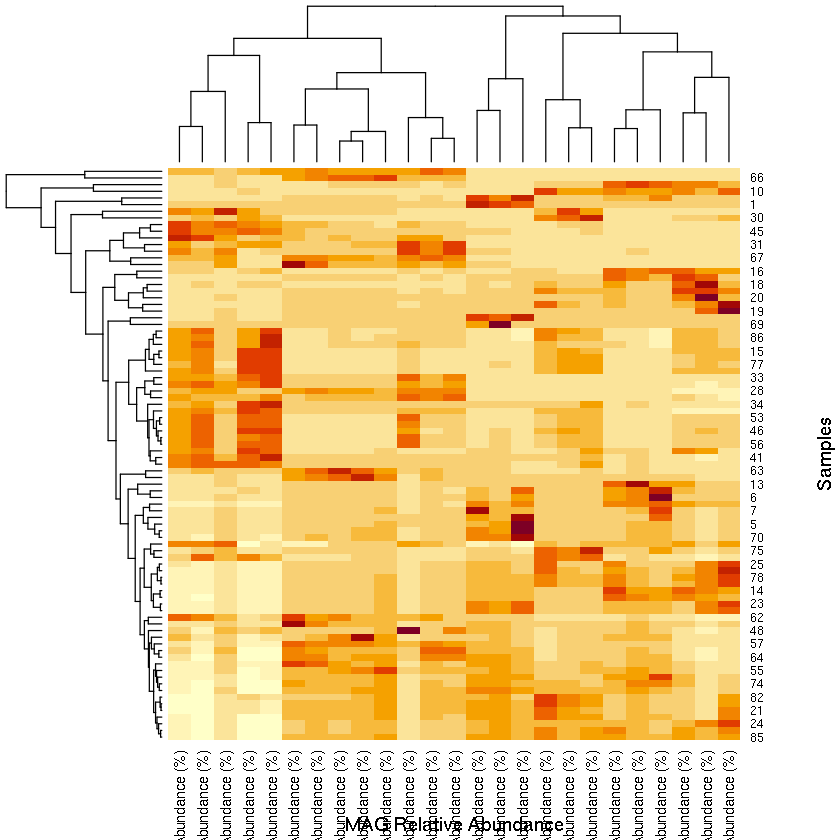

In [5]:
# Correlation heatmap of scaled relative abundance values for samples

heatmaply(scale(relative_abundances_shrc[Genome!="unmapped", .SD, .SDcols=!c("Genome")]),
          xlab = "MAG Relative Abundance",
          ylab = "Samples",
          file = "/work/microbiome/abisko/rhys/01-projects/08-coevolution/00-abisko_coev/relative_abundances_shrc_heatmap.html",
          k_row = 2, k_col = 2, plot_method="ggplot")

# heatmap(scale(relative_abundances_shrc[Genome!="unmapped", .SD, .SDcols=!c("Genome")]),
#           xlab = "MAG Relative Abundance",
#           ylab = "Samples",
#           file = "/work/microbiome/abisko/rhys/01-projects/08-coevolution/00-abisko_coev/relative_abundances_shrc_heatmap.html",
#           k_row = 2, k_col = 2, plot_method="ggplot")

In [10]:
# Correlation heatmap of scaled relative abundance values for MAGs

tmp <- heatmaply_cor(relative_cor,
          xlab = "MAGs",
          ylab = "MAGs",
          file = "/srv/projects/abisko/rhys/01-projects/08-coevolution/00-abisko_coev/relative_abundances_mag_cor_heatmap.html",
          k_row = 2, k_col = 2, plot_method="ggplot")

In [37]:
# PALSA: Relative abundance correlation
tmp <- heatmaply_cor(relative_cor_p,
          xlab = "MAGs",
          ylab = "MAGs",
          file = "/srv/projects/abisko/rhys/01-projects/08-coevolution/00-abisko_coev/relative_abundances_palsa_mag_cor_heatmap.html",
          k_row = 2, k_col = 2, plot_method="ggplot")

In [ ]:
# Correlation heatmap of the scaled trimmed mean coverage values

heatmaply_cor(cor(scale(trimmed_abundances[Genome!="unmapped", .SD, .SDcols=!c("Genome")])),
          xlab = "Samples",
          ylab = "Samples",
          file = "/srv/projects/abisko/rhys/01-projects/08-coevolution/00-abisko_coev/trimmed_mean_sample_cor_heatmap.html",
          k_row = 2, k_col = 2, plot_method="ggplot")

In [11]:
tmp <- heatmaply_cor(trimmed_cor,
          xlab = "MAGs",
          ylab = "MAGs",
          file = "/srv/projects/abisko/rhys/01-projects/08-coevolution/00-abisko_coev/trimmed_mean_mag_cor_heatmap.html",
          k_row = 2, k_col = 2, plot_method="ggplot")

In [ ]:
# Correlation heatmap of the scaled mean coverage values

heatmaply_cor(cor(scale(mean_abundances[Genome!="unmapped", .SD, .SDcols=!c("Genome")])),
          xlab = "MAGs",
          ylab = "MAGs",
          file = "/srv/projects/abisko/rhys/01-projects/08-coevolution/00-abisko_coev/mean_sample_cor_heatmap.html",
          k_row = 2, k_col = 2, plot_method="ggplot")

In [ ]:
tmp <- heatmaply_cor(trimmed_cor,
          xlab = "MAGs",
          ylab = "MAGs",
          file = "/srv/projects/abisko/rhys/01-projects/08-coevolution/00-abisko_coev/trimmed_mean_mag_cor_heatmap.html",
          k_row = 2, k_col = 2, plot_method="ggplot")